# Приведение к каноническому виду

Границы отрисовки графика

In [1]:
xmin = -10;
xmax = 10;
ymin = -10;
ymax = 10;
zmin = -10;
zmax = 10;

Задаем функцию

In [7]:
f[x_, y_, z_] = 7*x^2 + 3*y^2 + 3*z^2 +  8*x*y + 8*x*z + 6*y*z + 6*x + y + 7;

Строим график

-Graphics3D-
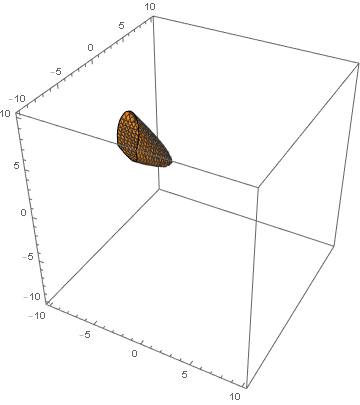

In [8]:
ContourPlot3D[f[x,y,z] == 0, {x, xmin, xmax}, {y, ymin, ymax}, {z, zmin, zmax}]

Задаем матрицу квадратичной формы и столбец коэффициентов линейной формы, а также сохраняем свободный член

In [9]:
matrix = {{7, 4, 4}, {4, 3, 3}, {4, 3, 3}};
a = {3, 0.5, 0};
a0 = 7;

Матрица в матричном виде

7   4   4

4   3   3

4   3   3
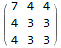

In [12]:
matrix // MatrixForm 

Столбец коэффициентов в матричном виде

3

0.5

0
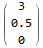

In [13]:
a // MatrixForm

Получение собственных значений, как видно собственные значения полученные через матричные операции равны собственным значениям
полученный при помощи стандартной функции Eigenvalues

In [14]:
evalues = N[Solve[Det[matrix-l*IdentityMatrix[3]] == 0, l][[All,1,2]]]
eigenvalues = N[Eigenvalues[matrix]]

{0., 0.821092, 12.1789}
{12.1789, 0.821092, 0.}

Автоматическая проверка на равенство собственных значений

In [16]:
comparevalues = True;
For[i=1, i<Length[evalues], i++, 
    If[evalues[[i]]==eigenvalues[[4-i]], Null, comparevalues=False]]
If[comparevalues==True, 
    Print["My eigen values and eigen values from standart function is equal."], 
    Print["My eigen values and eigen values from standart function is not equal."]];

My eigen values and eigen values from standart function is equal.


Получение собственных векторов, как видно собственные векторы полученные через матричные операции равны собственным значениям полученный при помощи стандартной функции Eigenvectors

In [19]:
evectors = {{0,0,0},{0,0,0},{0,0,0}};
For[i=1, i<=Length[evectors], i++,
    m = matrix - evalues[[i]]*IdentityMatrix[3];
    sol = {x, y, z} /. First[Solve[{m.{x, y, z} == {0, 0, 0}}, {x,y}]] /. z->1;
    Print[sol];
    evectors[[i]] = N[sol / Sqrt[Transpose[sol].sol]];]

{0., -1., 1}
{-1.29473, 1., 1}
{1.54473, 1., 1}


In [21]:
eigenvectors = N[Eigenvectors[matrix]];
For[i=1, i<=Length[eigenvectors], i++,
    Print[eigenvectors[[4-i]]];]

{0., -1., 1.}
{-1.29473, 1., 1.}
{1.54473, 1., 1.}


Автоматическая проверка на равенство собственных векторов

In [23]:
comparevectors = True;
For[i=1, i<=Length[eigenvectors], i++, 
    evector = N[eigenvectors[[4-i]] / Sqrt[Transpose[eigenvectors[[4-i]]].eigenvectors[[4-i]]]];
    For[j=1, j<=Length[eigenvectors[[i]]], j++, If[evectors[[i,j]]==evector[[j]], Null, comparevectors=False]]]
If[comparevectors==True, 
    Print["My eigen vectors and eigen vectors from standart function is equal."], 
    Print["My eigen vectors and eigen vectors from standart function is not equal."]];

My eigen vectors and eigen vectors from standart function is equal.


Получаем нужные коэффициенты для канонической формы

In [26]:
resa = evectors.a

{-0.353553, -1.76501, 2.45148}

Канонический вид

In [27]:
resf[x_, y_, z_] = evalues[[3]]*x^2 + evalues[[2]]*y^2 + evalues[[1]]*z^2 + 2*resa[[2]]*x + 2*resa[[3]]*y + 2*resa[[1]]*z + a0;

Построим график

-Graphics3D-
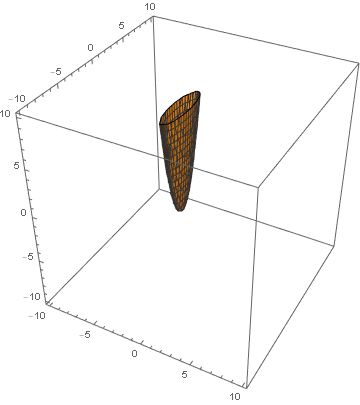

In [28]:
ContourPlot3D[resf[x,y,z] == 0, {x, xmin, xmax}, {y, ymin, ymax}, {z, zmin, zmax}]